<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Machine%20Learning/09_20_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


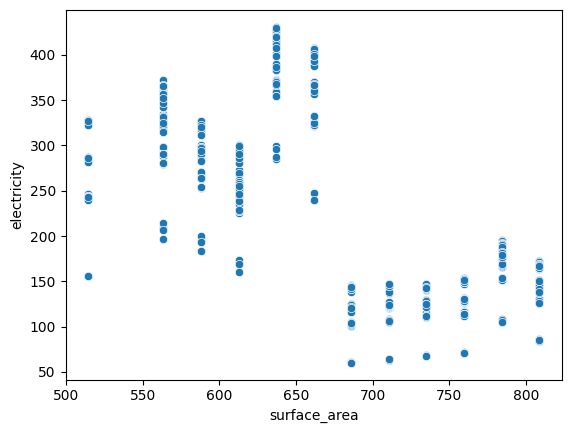

In [5]:
sns.scatterplot(data=Elec,
                x='surface_area',
                y='electricity')
plt.show()

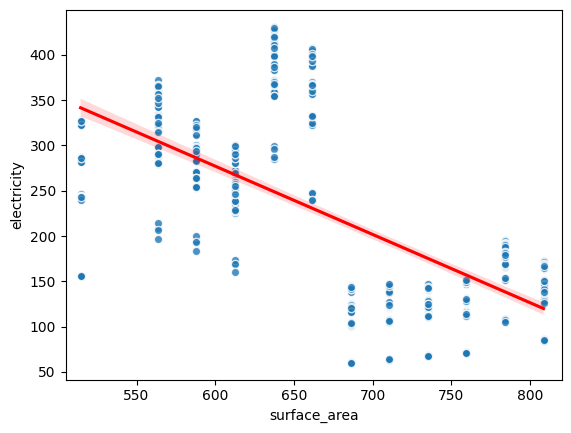

In [7]:
sns.regplot(data=Elec,
            x='surface_area',
            y='electricity',
            line_kws={'color':'red'},
            scatter_kws={'edgecolor':'white'})
plt.xlim(505,820)
plt.show()  # 건물 면적 당 전력사용량

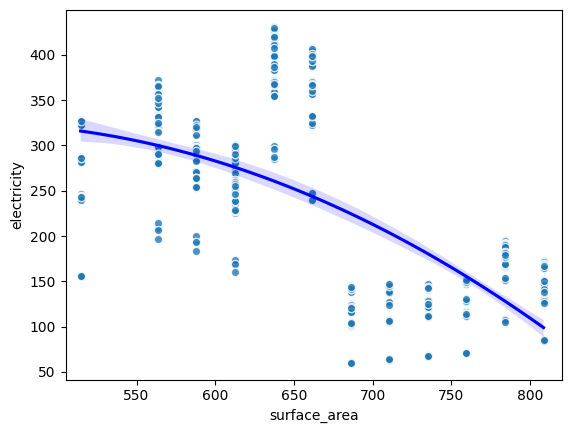

In [8]:
sns.regplot(data=Elec,
            x='surface_area',
            y='electricity',
            line_kws={'color':'blue'},
            scatter_kws={'edgecolor':'white'},
            order=2)
plt.xlim(505,820)
plt.show()

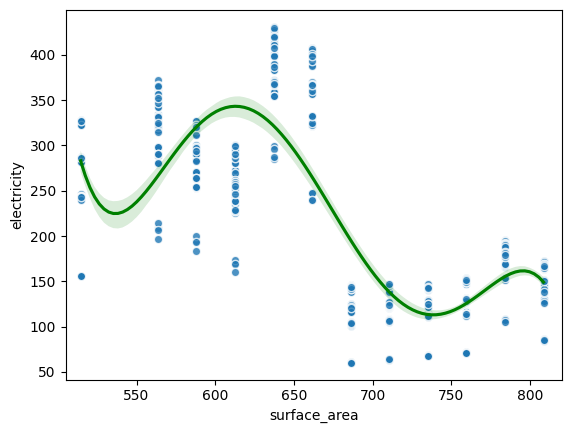

In [9]:
sns.regplot(data=Elec,
            x='surface_area',
            y='electricity',
            line_kws={'color':'green'},
            scatter_kws={'edgecolor':'white'},
            order=5)
plt.xlim(505,820)
plt.show()

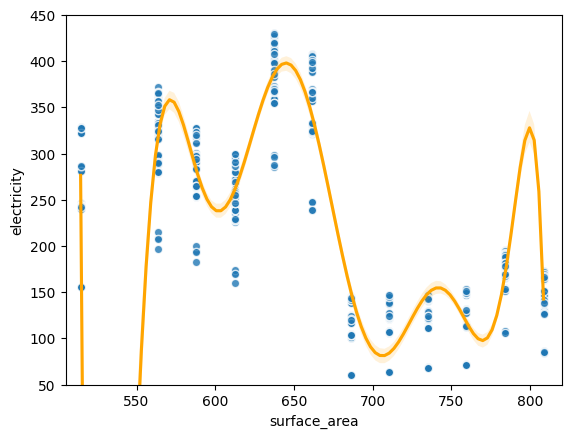

In [11]:
sns.regplot(data=Elec,
            x='surface_area',
            y='electricity',
            line_kws={'color':'orange'},
            scatter_kws={'edgecolor':'white'},
            order=9)
plt.xlim(505,820)
plt.ylim(50,450)
plt.show()

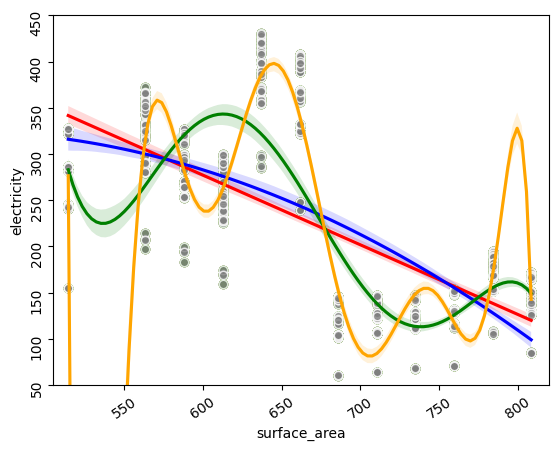

In [13]:
sns.regplot(data=Elec, x='surface_area', y='electricity',
            line_kws={'color':'red'})
sns.regplot(data=Elec, x='surface_area', y='electricity',
            line_kws={'color':'blue'}, order=2)
sns.regplot(data=Elec, x='surface_area', y='electricity',
            line_kws={'color':'green'}, order=5)
sns.regplot(data=Elec, x='surface_area', y='electricity',
            line_kws={'color':'orange'}, order=9,
            scatter_kws={'color':'gray', 'edgecolor':'white'})

plt.xlim(505,820)
plt.ylim(50,450)
plt.xticks(rotation=35)
plt.yticks(rotation=90)
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [15]:
x_train = Elec[['surface_area']]
y_train = Elec['electricity']

x_train.shape, y_train.shape

((768, 1), (768,))

In [16]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression()

In [17]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


In [19]:
y_hat_1 = Model_1.predict(x_train)
len(y_hat_1)

768

In [20]:
TR_Err_1 = np.mean((y_train - y_hat_1) **2)
TR_Err_1

5763.983779426344

## 5차 모델 Training Error

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5, include_bias=False)
PX_5=poly.fit_transform(x_train)

In [24]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [25]:
x_train.shape, PX_5.shape

((768, 1), (768, 5))

In [27]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

In [30]:
np.set_printoptions(suppress=True, precision=40)
print(Model_5.coef_)
print(Model_5.intercept_)

[-0.00031551482066185534       -0.1029296835336089
  0.00037876155771186435       -0.0000005032064365372355
  0.00000000022980592429000524]
2906.2216253808647


In [31]:
PX_5_pred=poly.fit_transform(x_train)
y_hat_5=Model_5.predict(PX_5_pred)
y_hat_5.shape

(768,)

In [32]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726328606077

## 9차 모델 Training Error

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=9, include_bias=False)
PX_9=poly.fit_transform(x_train)

In [34]:
x_train.shape, PX_9.shape

((768, 1), (768, 9))

In [35]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

In [36]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184634688
  0.0000000000000000040128728976712735
  0.000000000000000000019806870398781567
  0.000000000000000009606888487135083
  0.0000000000000031773264060317083
  0.0000000000006336691113703143
 -0.0000000000000022880589639802964
  0.000000000000000002775149473685744
 -0.0000000000000000000011271003952673454   ]
-440.08258373868114


In [37]:
PX_9_pred=poly.fit_transform(x_train)
y_hat_9=Model_9.predict(PX_9_pred)
y_hat_9.shape

(768,)

In [38]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908141247

In [39]:
print('1차모델 : ', TR_Err_1)
print('5차모델 : ', TR_Err_5)
print('9차모델 : ', TR_Err_9)

1차모델 :  5763.983779426344
5차모델 :  4177.726328606077
9차모델 :  4086.7199908141247


## Testing Error

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.shape

(768, 9)

# Train_Data vs. Test_Data

## DataFrame Split

In [41]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec,
                                    test_size = 0.2,
                                    random_state = 2045)

In [42]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [43]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [44]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


## Array Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']],
                                                    Elec['electricity'],
                                                    test_size=0.2,
                                                    random_state=2045)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 1), (154, 1), (614,), (154,))

In [49]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [50]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

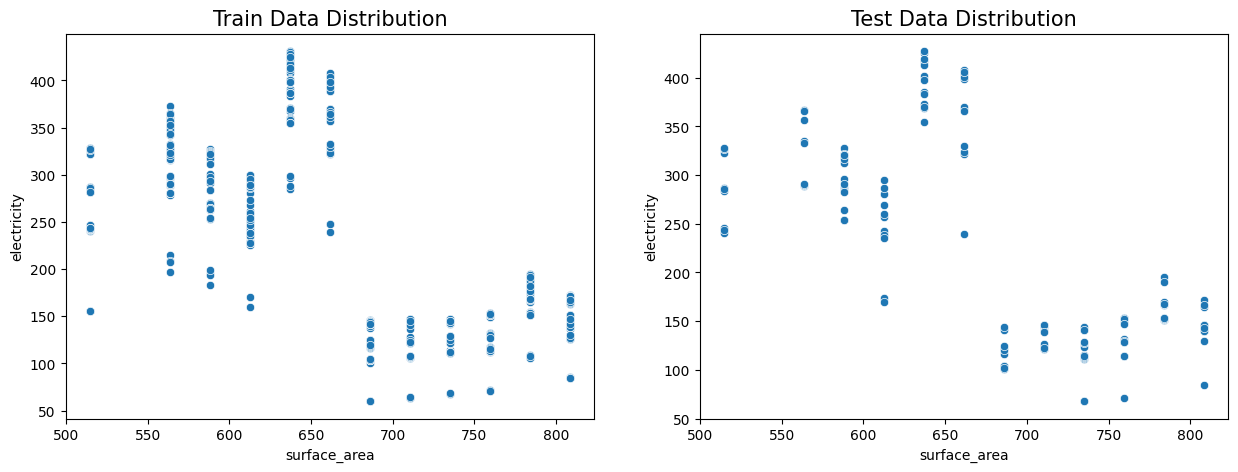

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.scatterplot(data=TR_Elec,
                x='surface_area',
                y='electricity',
                ax=ax[0])
sns.scatterplot(data=TE_Elec,
                x='surface_area',
                y='electricity',
                ax=ax[1])

ax[0].set_title('Train Data Distribution', size=15)
ax[1].set_title('Test Data Distribution', size=15)

plt.show()

## 1차 모델 Testing Error

In [54]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

In [55]:
y_hat_1 = Model_1.predict(X_test)
y_hat_1.shape

(154,)

In [56]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test,y_hat_1)
TE_Err_1

6044.176547629271

## 5차 모델 Testing Error

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree = 5 , include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [58]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [60]:
PX_5_TE = poly.fit_transform(X_test)
y_hat_5 = Model_5.predict(PX_5_TE)

In [61]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409623

## 9차모델 Testing Error

In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree = 9 , include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [63]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [64]:
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

In [65]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.6890671375695

In [66]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409623
9차 모델 :  4238.6890671375695


# Validation Approach

In [67]:
import pandas as pd

url='https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [68]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']],
                                                      Elec['electricity'],
                                                      test_size=int(len(Elec)*0.2),
                                                      random_state=2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size=int(len(Elec)*0.2),
                                                      random_state=2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


## 5차 모델 Validation Error

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [72]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [73]:
PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)

In [74]:
from sklearn.metrics import mean_squared_error
MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.431259340615

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [76]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [77]:
PX9_valid = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX9_valid)

In [78]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124900854

In [79]:
print('5차 모델 MSE_5 : ', MSE_5)
print('9차 모델 MSE_9 : ', MSE_9)

5차 모델 MSE_5 :  4136.431259340615
9차 모델 MSE_9 :  3955.9733124900854


In [80]:
PX9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test,Model_9.predict(PX9_TE))

4220.8857321070645